# 데이터와 라이브러리 불러오기

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [4]:
df = pd.read_csv('./anomaly_detecting.csv', index_col=0)
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_8136\3710316463.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./anomaly_detecting.csv', index_col=0)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 'TARGET' 변수에 값이 숫자와 문자가 혼합되어 있다.
df['TARGET'].value_counts()

TARGET
.    187510
0    105347
1      9341
0      4880
1       433
Name: count, dtype: int64

In [6]:
# 문자 0, 1을 숫자 0, 1로 바꾸어준다.
df.loc[df['TARGET'] == '0', 'TARGET'] = 0
df.loc[df['TARGET'] == '1', 'TARGET'] = 1
df['TARGET'].value_counts()

TARGET
.    187510
0    110227
1      9774
Name: count, dtype: int64

# EDA

In [8]:
# 데이터프레임 정보
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  object 
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE              307

In [9]:
# 기초통계량
df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


* CNT_CHILDREN의 최대값이 19이다. => 한 가정에 자녀가 19명이면 너무 많지 않은가?
* DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH 값이 음수이다.

In [12]:
# 결측치 살펴보기
nulls = df.isnull().sum().sort_values(ascending=False) / df.shape[0]
nulls

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
                              ...   
NAME_HOUSING_TYPE           0.000000
NAME_FAMILY_STATUS          0.000000
NAME_EDUCATION_TYPE         0.000000
NAME_INCOME_TYPE            0.000000
SK_ID_CURR                  0.000000
Length: 122, dtype: float64

In [13]:
# 결측치가 전체의 45%가 넘는 변수
print(nulls[nulls > 0.45])
print('-' * 45)
print('Total Counts:', nulls[nulls > 0.45].shape[0])

COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_AVG                 0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MO

* 결측치의 비율이 50%에 가깝거나 그 이상인 변수들은 49개로 고객의 주거지에 대한 정보를 담은 47개 행 전부와 OWN_CAR_AGE, EXT_SOURCE_1가 해당된다.
    
    => 결측치를 제거하고 모든 변수를 사용한다면, 데이터에 최대 70%가량의 손실이 생기므로, 결측치가 많은 변수들을 제거한다.

In [22]:
# 결측치가 전체의 45%가 넘는 변수들 삭제
df.drop(nulls[nulls > 0.45].index.tolist(), axis=1, inplace=True)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


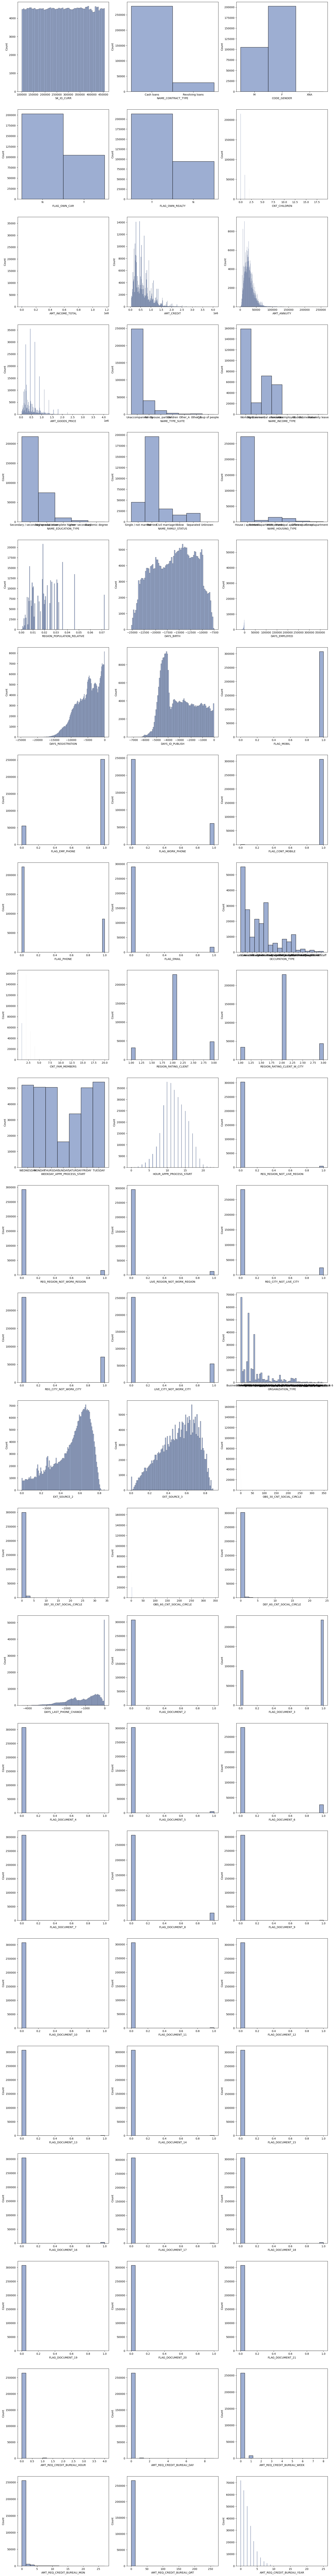

In [24]:
# 독립변수의 분포 살펴보기
X_columns = df.drop('TARGET', axis=1).columns.tolist()
n_columns = len(X_columns)
if n_columns % 3 == 0:
    n_rows = n_columns // 3
else:
    n_rows = n_columns // 3 + 1

fig, axes = plt.subplots(n_rows, 3, figsize=(21, 7 * (n_rows + 1)))

for i, cn in enumerate(X_columns):
    row = i // 3
    col = i % 3
    sns.histplot(x=cn, data=df, ax=axes[row][col], color='#7C93C3')

* CODE_GENDER: 여성의 비중이 더 높으며, 남녀 외에 'XNA' 값이 있다.
* OCCUPATION_TYPE, ORGANIZATION_TYPE: 범주형 변수인데, 범주의 개수가 매우 많은 것으로 보인다.
* DAYS_EMPLOYED: 거의 다 0보다 작은 값을 가지나, 0보다 큰 값을 가지는 데이터가 있는 것으로 보인다.
* DAYS_ID_PUBLISH: -5000~-4000 사이에 데이터 수가 급증했다가 -4000에서 급격히 줄어든다.


* AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, AMT_REQ_CREDIT_BUREAU_YEAR: 오른쪽으로 꼬리가 길다.
* DAYS_REGISTRATION, EXT_SOURCE_2: 왼쪽으로 꼬리가 길다.


---

* CONTRACT_TYPE: 리볼빙보다 현금 대출에 해당하는 고객이 훨씬 많다.


* FLAG_OWN_CAR: 자동차가 없는 고객이 더 많다.
* FLAG_OWN_REALTY: 자가가 있는 고객이 더 많다.

* CNT_CHILDREN: 아이가 없는 고객이 월등히 많다.

* NAME_TYPE_SUITE: 'Unaccompanied'가 가장 많다. => 동행자가 없는 경우가 가장 많다.
    
* NAME_INCOME_TYPE: 'Working'이 가장 많다. => 근로자가 가장 많다.
* NAME_EDUCATION_TYPE: 'Secondary / secondary special'가 가장 많다. => 중등교육까지 받은 사람들이 가장 많다.
* NAME_FAMILY_STATUS: 'Married'가 가장 많다.
* NAME_HOUSING_TYPE: 'House/apartment'가 가장 많다.


* FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_CONT_MOBILE: 대부분 값이 1이다. => 정보를 제공한 경우가 많다.
    
* FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL: 대부분 값이 0이다. => 정보를 제공하지 않은 경우가 많다.

* CNT_FAM_MEMBERS: 대부분 가족의 수는 5명 이하이다.

* REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY: 2점이 가장 많다.

* WEEKDAY_APPR_PROCESS_START: 일요일이 가장 적다.

* REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY: 0 값이 대부분이다. => 대부분 두 가지 주소가 일치한다.

* OBS_60_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE: 대부분 값이 0이다. => 대부분 주위 사람 중 연체 가능성이 있거나 실제로 연체한 사람이 없다.

* DAYS_LAST_PHONE_CHANGE: 대부분 값이 0이다. => 핸드폰을 바꾸지 않은 사람이 대부분이다.

* FLAG_DOCUMETN 2~21: 대부분 0 값이 훨씬 많으나, 3은 1값이 더 많다. => 대부분 문서를 제공하지 않았으나, DOCUMENT 3의 경우 제공한 경우가 더 많다.

* AMT_REQ_CREDIT_BUREAU_[HOUR/DAY/WEEK/MON/QRT]: 대부분의 값이 0이다. => 대부분 CB(신용평가회사)로 문의가 들어오지 않았다.

---

* AMT_INCOME_TOTAL, OBS_30_CNT_SOCIAL_CIRCLE: 값이 어떻게 구성되어있는지 히스토그램으로 확인 불가

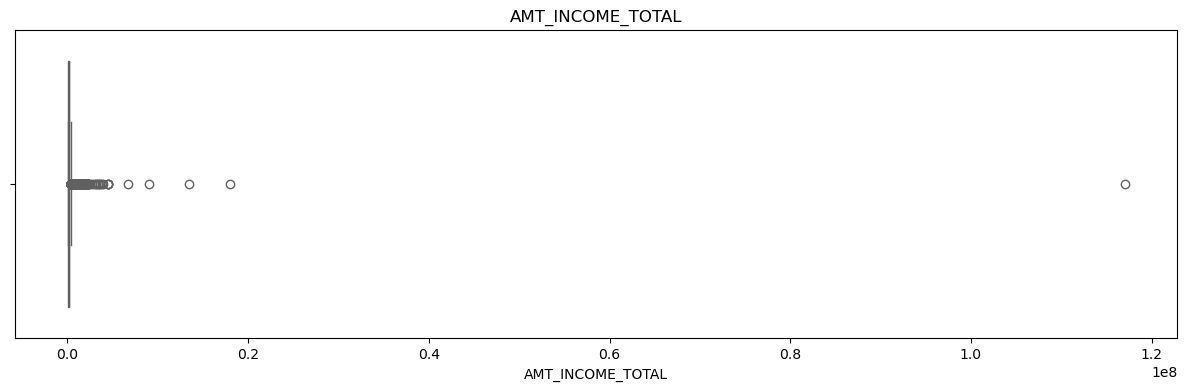

In [27]:
# AMT_INCOME_TOTAL
plt.figure(figsize=(15, 4))
sns.boxplot(x='AMT_INCOME_TOTAL', data=df, color='#7C93C3')
plt.title('AMT_INCOME_TOTAL')
plt.show()

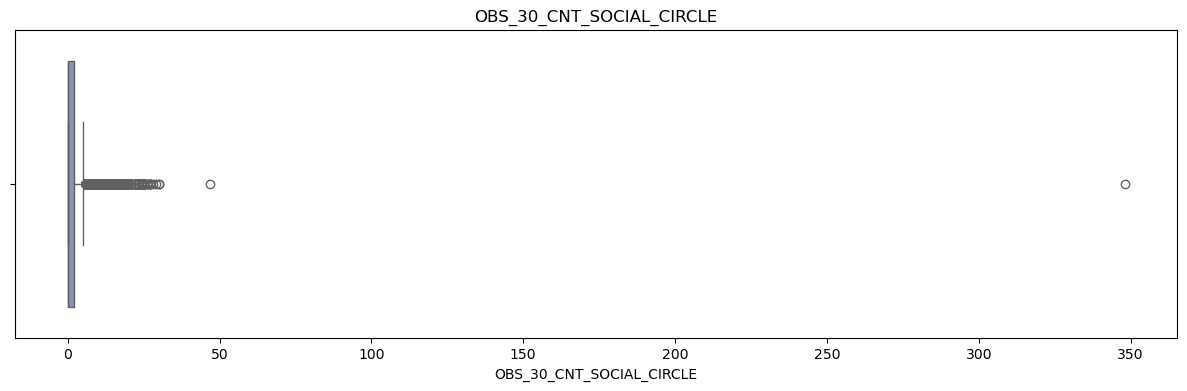

In [29]:
# OBS_30_CNT_SOCIAL_CIRCLE
plt.figure(figsize=(15, 4))
sns.boxplot(x='OBS_30_CNT_SOCIAL_CIRCLE', data=df, color='#7C93C3')
plt.title('OBS_30_CNT_SOCIAL_CIRCLE')
plt.show()

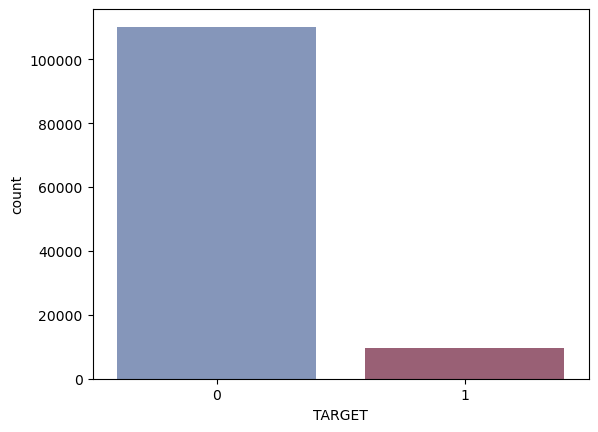

In [37]:
# 종속변수인 'TARGET'의 분포
sns.countplot(x='TARGET', data=df.loc[df['TARGET'] != '.'], hue='TARGET', legend=False, palette=['#7C93C3', '#A25772'])
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


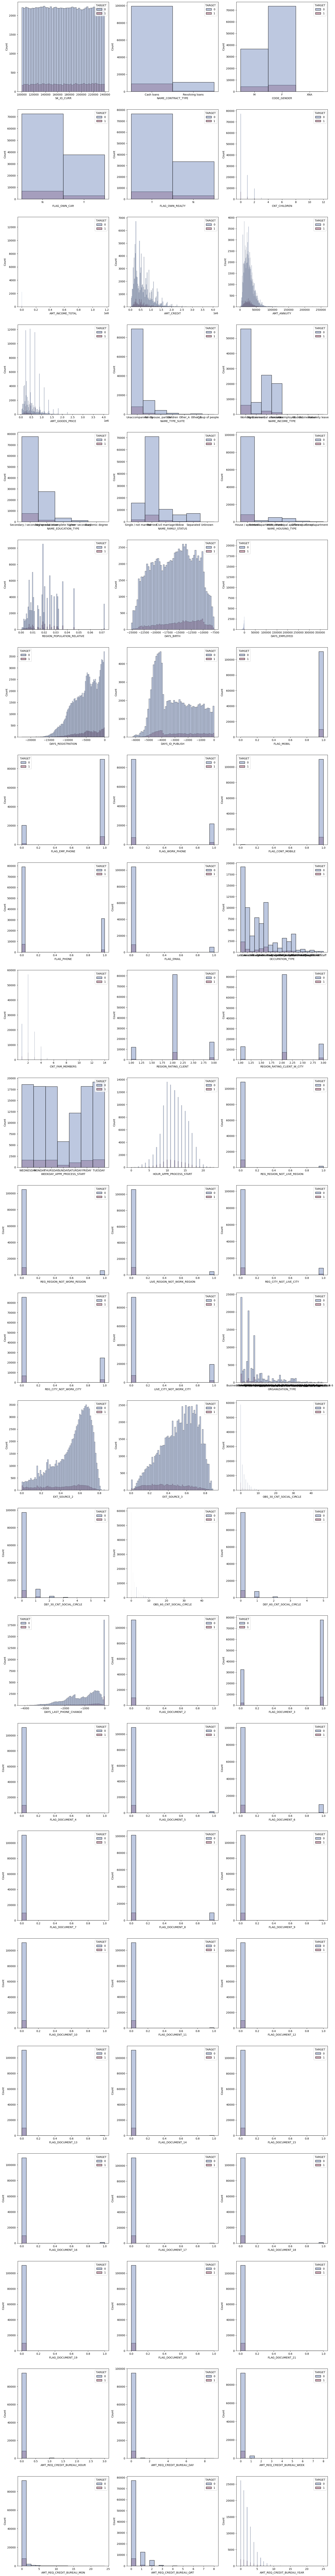

In [41]:
# TARGET 값에 따른 독립변수의 분포 살펴보기
X_columns = df.drop('TARGET', axis=1).columns.tolist()
n_columns = len(X_columns)
if n_columns % 3 == 0:
    n_rows = n_columns // 3
else:
    n_rows = n_columns // 3 + 1

fig, axes = plt.subplots(n_rows, 3, figsize=(21, 7 * (n_rows + 1)))

for i, cn in enumerate(X_columns):
    row = i // 3
    col = i % 3
    sns.histplot(x=cn, data=df.loc[df['TARGET'] != '.'], ax=axes[row][col], hue='TARGET', palette=['#7C93C3', '#A25772'])

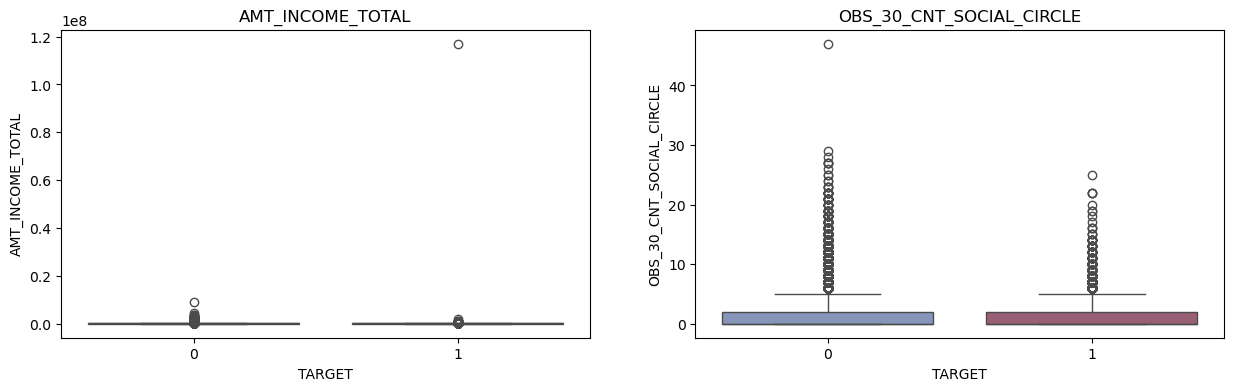

In [54]:
plt.figure(figsize=(15, 4))

# AMT_INCOME_TOTAL
plt.subplot(1, 2, 1)
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df.loc[df['TARGET'] != '.'], hue='TARGET', legend=False, palette=['#7C93C3', '#A25772'])
plt.title('AMT_INCOME_TOTAL')

# OBS_30_CNT_SOCIAL_CIRCLE
plt.subplot(1, 2, 2)
sns.boxplot(x='TARGET', y='OBS_30_CNT_SOCIAL_CIRCLE', data=df.loc[df['TARGET'] != '.'], hue='TARGET', legend=False, palette=['#7C93C3', '#A25772'])
plt.title('OBS_30_CNT_SOCIAL_CIRCLE')

plt.show()

<Axes: >

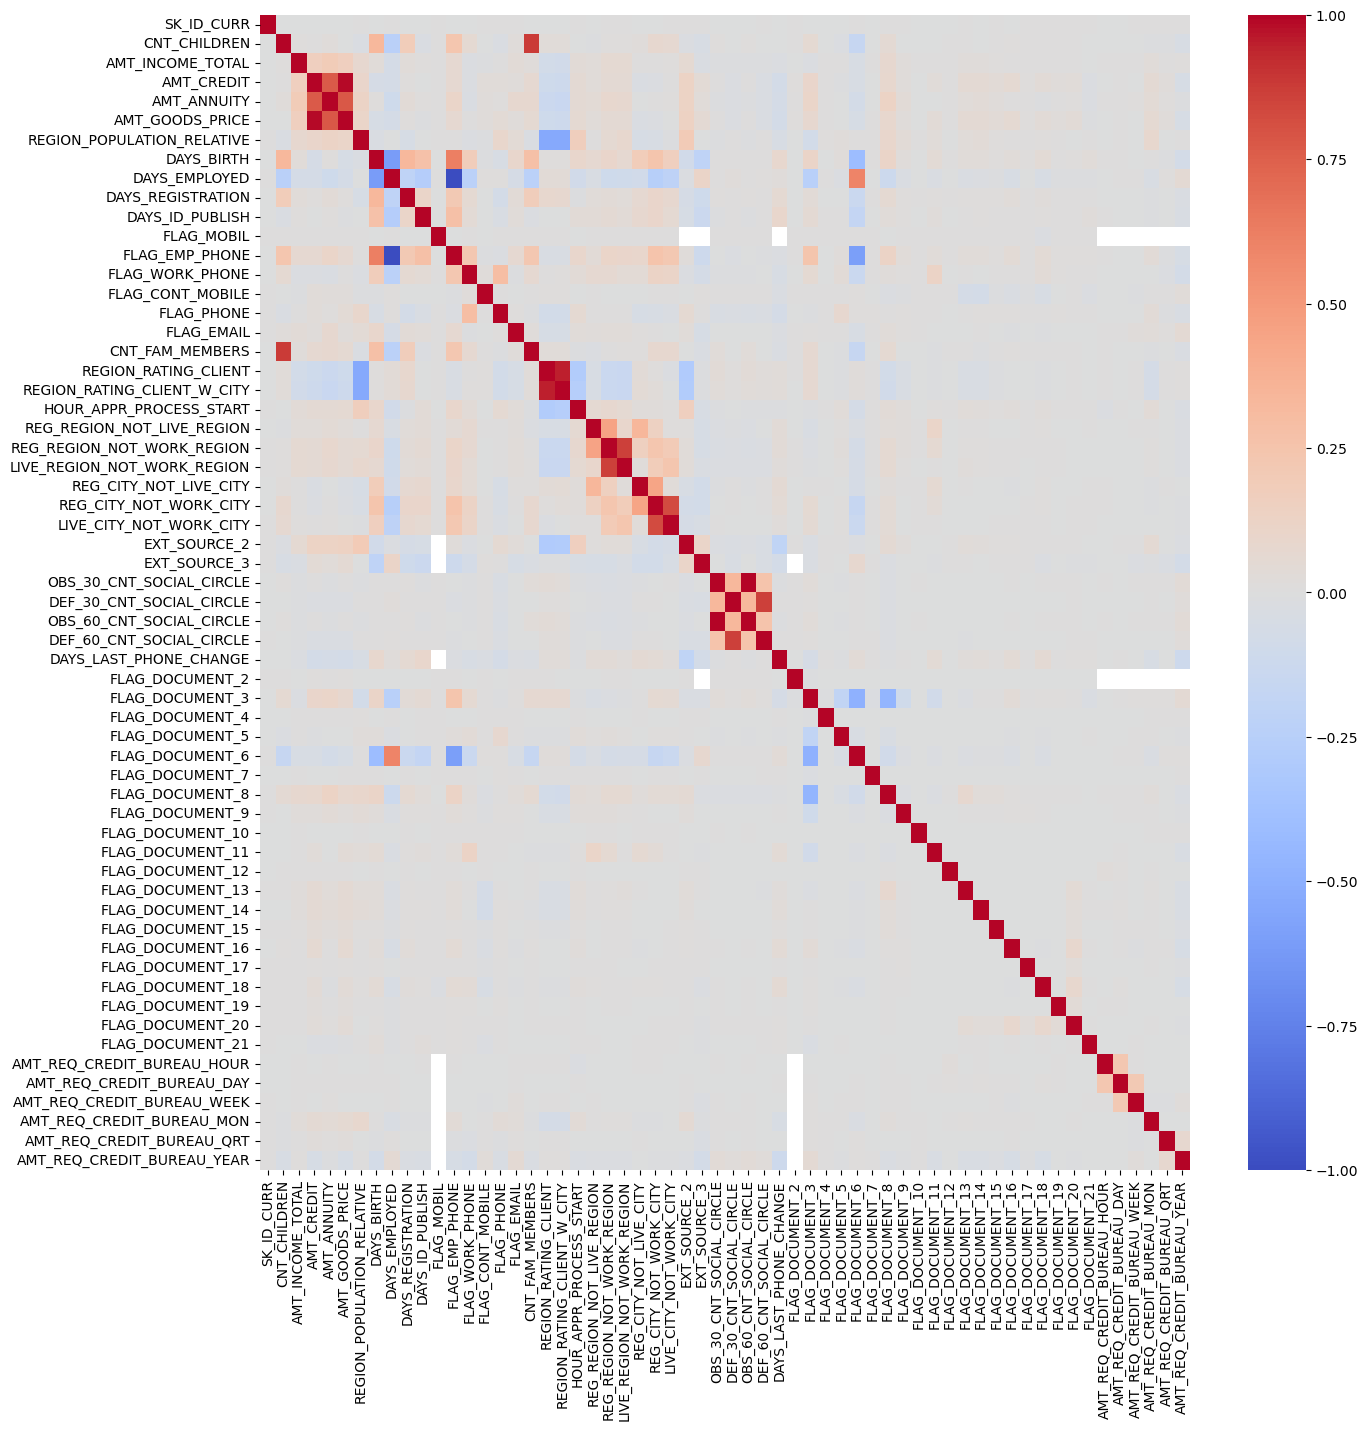

In [56]:
# Correlation 히트맵
X_columns = df.drop('TARGET', axis=1).columns.tolist()
cols_num = []

for col in X_columns:
    if df[col].dtype in ['int64', 'float']:
        cols_num.append(col)

plt.figure(figsize=(15, 15))
sns.heatmap(df[cols_num].corr(), vmin=-1, vmax=1, cmap='coolwarm')

In [58]:
# 상관관계가 높은 변수들 파악하기(절댓값이 0.3보다 큰 변수 조합)
corr_mat = df[cols_num].corr()
key1_list = []
key2_list = []
value_list = []

for i in range(len(cols_num)):
    for j in range(i+1, len(cols_num)):
        if (corr_mat.iloc[i, j] > 0.3) or (corr_mat.iloc[i, j] < -0.3):
            key1 = cols_num[i]
            key2 = cols_num[j]
            value = corr_mat.iloc[i, j]

            key1_list.append(key1)
            key2_list.append(key2)
            value_list.append(value)

high_corr = pd.DataFrame({'Column 1': key1_list, 'Column 2': key2_list, 'Correlation': value_list})
high_corr.sort_values('Correlation', ascending=False)

,Column 1,Column 2,Correlation
21,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998490
3,AMT_CREDIT,AMT_GOODS_PRICE,0.986968
14,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950842
1,CNT_CHILDREN,CNT_FAM_MEMBERS,0.879161
17,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.860627
23,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.860517
19,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.825575
4,AMT_ANNUITY,AMT_GOODS_PRICE,0.775109
2,AMT_CREDIT,AMT_ANNUITY,0.770138
9,DAYS_BIRTH,FLAG_EMP_PHONE,0.619888


* (OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE), (DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE): 후자가 전자에 포함된다.
* (DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE)
* (OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE)

---

* AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE: 사용하고자 하는 만큼 대출하고, 대출 한 만큼 매달 갚는 돈이 달라지므로 당연히 비례한다.

---

* (REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY): 도시 고려 여부를 제외하면 같은 지표이다.

---

* CNT_CHILDREN, CNT_FAM_MEMBERS: 아이가 가족 수에 포함된다.
* CNT_CHILDREN, DAYS_BIRTH: 자녀가 있을 만한 나이대와 없을 만한 나이대가 있으므로 상관관계를 보이는 듯하다.

---

* (REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION), (REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY): 영구주소와 연락주소가 대부분 일치하므로 결과가 유사하다.
* REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION
* REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY
* REG_REGION_NOT_LIVE_REGION, REG_CITY_NOT_LIVE_CITY

---

* (DAYS_EMPLOYED, FLAG_DOCUMENT_6) (FLAG_EMP_PHONE, FLAG_DOCUMENT_6): DOCUMENT 6이 직장과 관련이 있을 가능성

---

* DAYS_BIRTH, DAYS_EMPLOYED: 나이에 따라 가능한 일한 기간이 다르다.

---

* REGION_POPULATION_RELATIVE & REGION_RATING_CLIENT(_W_CITY): 인구수와 점수가 반비례한다.

---

* DAYS_EMPLOYED & FLAG_EMP_PHONE: 일자리가 있어야 직장 번호를 제공할 수 있다.

---

* DAYS_BIRTH, FLAG_EMP_PHONE
* DAYS_BIRTH, DAYS_REGISTRATION
* DAYS_BIRTH, FLAG_DOCUMENT_6

* FLAG_DOCUMENT_3, FLAG_DOCUMENT_8
* FLAG_DOCUMENT_3, FLAG_DOCUMENT_6

# 전처리

In [126]:
df_pre = df.copy()

## 사용하지 않을 변수 제거
* SK_ID_CURR
* CNT_CHILDREN
* REGION_RATING_CLIENT_W_CITY: REGION_RATING_CLIENT만으로도 충분히 설명 가능
* OBS_60_CNT_SOCIAL_CIRCLE: OBS_30_CNT_SOCIAL_CIRCLE 안에 포함된다.
* DEF_60_CNT_SOCIAL_CIRCLE: DEF_30_CNT_SOCIAL_CIRCLE 안에 포함된다.
* REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY: Region에 관한 변수만 사용한다.

In [129]:
df_pre.drop(['SK_ID_CURR', 'CNT_CHILDREN', 'REGION_RATING_CLIENT_W_CITY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
              'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'], axis=1, inplace=True)

## 결측치 처리

In [132]:
nulls = df_pre.isnull().sum().sort_values(ascending=False) / df_pre.shape[0]
nulls[nulls > 0]

OCCUPATION_TYPE               0.313455
EXT_SOURCE_3                  0.198253
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_HOUR    0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
NAME_TYPE_SUITE               0.004201
DEF_30_CNT_SOCIAL_CIRCLE      0.003320
OBS_30_CNT_SOCIAL_CIRCLE      0.003320
EXT_SOURCE_2                  0.002146
AMT_GOODS_PRICE               0.000904
AMT_ANNUITY                   0.000039
CNT_FAM_MEMBERS               0.000007
DAYS_LAST_PHONE_CHANGE        0.000003
dtype: float64

* OCCUPATION_TYPE는 범주형 변수라서 값을 채워넣기 어렵다. => 변수 제거

* 나머지 변수에 대해서는 최빈값 또는 중앙값으로 결측치를 채운다.
    * 범주형 변수나 특정 값이 월등하게 많이 등장하는 경우에는 최빈값 사용
    * 그 외에는 중앙값 사용

In [135]:
# OCCUPATION_TYPE 제거
df_pre.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [137]:
# 중앙값으로 결측치 채우기
median_list = ['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
               'AMT_ANNUITY', 'CNT_FAM_MEMBERS']

for col in median_list:
    val = df_pre[col].median()
    df_pre[col] = df_pre[col].fillna(val)

In [139]:
# 최빈값으로 결측치 채우기
mode_list = ['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK',
             'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'NAME_TYPE_SUITE',
             'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']

for col in mode_list:
    val = df_pre[col].mode().values[0]
    df_pre[col] = df_pre[col].fillna(val)

## 범주형 변수 처리

### ORGANIZATION_TYPE

In [143]:
# value counts
df_pre['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

* 전부 사용하기에는 종류가 너무 많으므로, 대분류에 따라 통합해준다.

In [146]:
# 뒤에 type이 붙은 것을 제거하여 분류 통합
new_val_list = []

for i in range(df_pre.shape[0]):
    val = df_pre['ORGANIZATION_TYPE'][i]
    val_lower = val.lower()
    type_index = val_lower.find('type')
    if type_index != -1:
        colon_index = val.find(':')
        if colon_index != -1:
            val = val[:colon_index]
        else:
            val = val[:type_index]

    new_val_list.append(val)

df_pre['ORGANIZATION_TYPE'] = new_val_list

df_pre['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity        84529
XNA                    55374
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14311
Medicine               11193
Government             10404
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 

### Encoding


In [148]:
# object형 변수 리스트
cols_obj = []

for col in df_pre.columns:
    if df_pre[col].dtype == 'object':
        cols_obj.append(col)

cols_obj.remove('TARGET')
cols_obj

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [149]:
# object형 변수 기술통계
df_pre[cols_obj].describe(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,2,2,7,8,5,6,6,7,35
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,TUESDAY,Business Entity
freq,278232,202448,202924,213312,249818,158774,218391,196432,272868,53901,84529


* One-Hot Encoding 진행
    * NAME_CONTRACT_TYPE, FLAG_OWN_CAR, FLAG_OWN_REALTY: 값이 2가지
    * CODE_GENDER, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE: 순서가 없음
    
* Label Encoding 진행
    * NAME_EDUCATION_TYPE, WEEKDAY_APPR_PROCESS_START: 순서가 있음
    * ORGANIZATION_TYPE: 값의 종류가 많음

#### One-Hot Encoding

In [152]:
from sklearn.preprocessing import OneHotEncoder

ohe_list = ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CODE_GENDER', 'NAME_TYPE_SUITE',
             'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

ohe = OneHotEncoder(drop='first', sparse_output=False)

result= ohe.fit_transform(df_pre[ohe_list])
result_df = pd.DataFrame(result, columns=ohe.get_feature_names_out().tolist())

df_pre.drop(ohe_list, axis=1, inplace=True)
df_pre = pd.concat([df_pre, result_df], axis=1)
df_pre.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,1,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special,0.018801,-9461,-637,-3648.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,270000.0,1293502.5,35698.5,1129500.0,Higher education,0.003541,-16765,-1188,-1186.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special,0.010032,-19046,-225,-4260.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special,0.008019,-19005,-3039,-9833.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special,0.028663,-19932,-3038,-4311.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Label Encoding

In [156]:
# 순서를 알고 있는 것은 낮은 것부터 높은 것까지 순서를 맞추어서 숫자를 배정한다.
education_dict = {'Lower secondary': 0, 'Secondary / secondary special': 1, 'Incomplete higher': 2,'Higher education': 3, 'Academic degree': 4}
weekday_dict = {'MONDAY': 0, 'TUESDAY': 1, 'WEDNESDAY': 2, 'THURSDAY': 3, 'FRIDAY': 4, 'SATURDAY': 5, 'SUNDAY': 6}

df_pre['NAME_EDUCATION_TYPE'] = df_pre['NAME_EDUCATION_TYPE'].map(education_dict)
df_pre['WEEKDAY_APPR_PROCESS_START'] = df_pre['WEEKDAY_APPR_PROCESS_START'].map(weekday_dict)

In [158]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_pre['ORGANIZATION_TYPE'] = le.fit_transform(df_pre['ORGANIZATION_TYPE'])

df_pre.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,1,202500.0,406597.5,24700.5,351000.0,1,0.018801,-9461,-637,-3648.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,270000.0,1293502.5,35698.5,1129500.0,3,0.003541,-16765,-1188,-1186.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,1,0.010032,-19046,-225,-4260.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,1,0.008019,-19005,-3039,-9833.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,121500.0,513000.0,21865.5,513000.0,1,0.028663,-19932,-3038,-4311.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 숫자형으로 되어있는 범주형의 변수 타입 변경

In [161]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307511 entries, 0 to 307510
Data columns (total 84 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   TARGET                                   307511 non-null  object 
 1   AMT_INCOME_TOTAL                         307511 non-null  float64
 2   AMT_CREDIT                               307511 non-null  float64
 3   AMT_ANNUITY                              307511 non-null  float64
 4   AMT_GOODS_PRICE                          307511 non-null  float64
 5   NAME_EDUCATION_TYPE                      307511 non-null  int64  
 6   REGION_POPULATION_RELATIVE               307511 non-null  float64
 7   DAYS_BIRTH                               307511 non-null  int64  
 8   DAYS_EMPLOYED                            307511 non-null  int64  
 9   DAYS_REGISTRATION                        307511 non-null  float64
 10  DAYS_ID_PUBLISH                      

In [165]:
# 숫자형으로 되어있는 범주형 변수 리스트
col_list = ['FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
            'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
            'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
            'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
            'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
            'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
            'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
            'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
            'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
            'NAME_CONTRACT_TYPE_Revolving loans', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y',
            'CODE_GENDER_M', 'CODE_GENDER_XNA', 'NAME_TYPE_SUITE_Family',
            'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B',
            'NAME_TYPE_SUITE_Spouse, partner', 'NAME_TYPE_SUITE_Unaccompanied',
            'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Maternity leave',
            'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
            'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working', 'NAME_FAMILY_STATUS_Married',
            'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Single / not married',
            'NAME_FAMILY_STATUS_Unknown', 'NAME_FAMILY_STATUS_Widow',
            'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment',
            'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Rented apartment',
            'NAME_HOUSING_TYPE_With parents', 'NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
            'ORGANIZATION_TYPE']

# 변수 타입 변환
for col in col_list:
    df_pre[col] = df_pre[col].astype('category')

In [167]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307511 entries, 0 to 307510
Data columns (total 84 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   TARGET                                   307511 non-null  object  
 1   AMT_INCOME_TOTAL                         307511 non-null  float64 
 2   AMT_CREDIT                               307511 non-null  float64 
 3   AMT_ANNUITY                              307511 non-null  float64 
 4   AMT_GOODS_PRICE                          307511 non-null  float64 
 5   NAME_EDUCATION_TYPE                      307511 non-null  category
 6   REGION_POPULATION_RELATIVE               307511 non-null  float64 
 7   DAYS_BIRTH                               307511 non-null  int64   
 8   DAYS_EMPLOYED                            307511 non-null  int64   
 9   DAYS_REGISTRATION                        307511 non-null  float64 
 10  DAYS_ID_PUBLISH          

## 숫자형 변수 처리

### 정규화
* 왜도가 높았던 변수들을 로그변환 시켜준다.

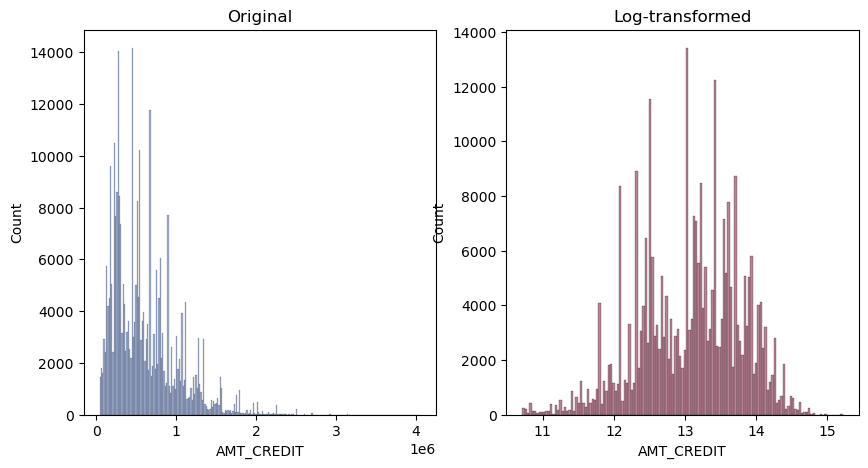

In [171]:
# AMT_CREDIT: 로그 변환

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df_pre['AMT_CREDIT'], ax=axes[0], color='#7C93C3')
sns.histplot(np.log1p(df_pre['AMT_CREDIT']), ax=axes[1], color='#A25772')
axes[0].set_title('Original')
axes[1].set_title('Log-transformed')

df_pre['AMT_CREDIT'] = np.log1p(df_pre['AMT_CREDIT'])

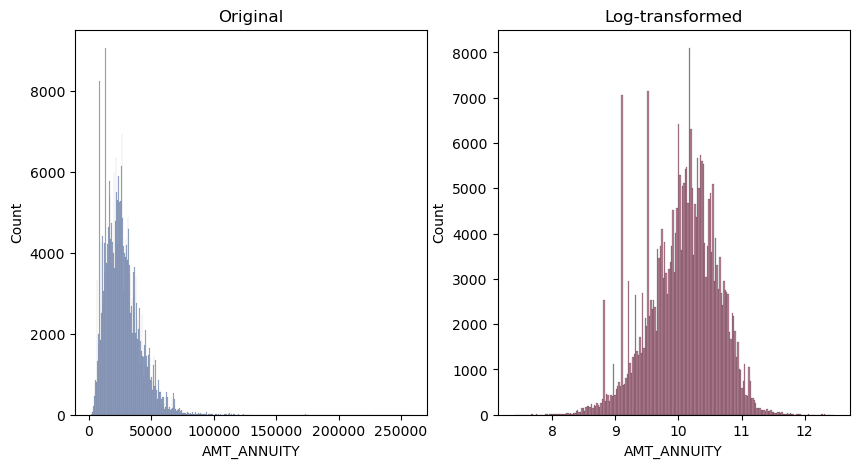

In [173]:
# AMT_ANNUITY: 로그 변환

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df_pre['AMT_ANNUITY'], ax=axes[0], color='#7C93C3')
sns.histplot(np.log1p(df_pre['AMT_ANNUITY']), ax=axes[1], color='#A25772')
axes[0].set_title('Original')
axes[1].set_title('Log-transformed')

df_pre['AMT_ANNUITY'] = np.log1p(df_pre['AMT_ANNUITY'])

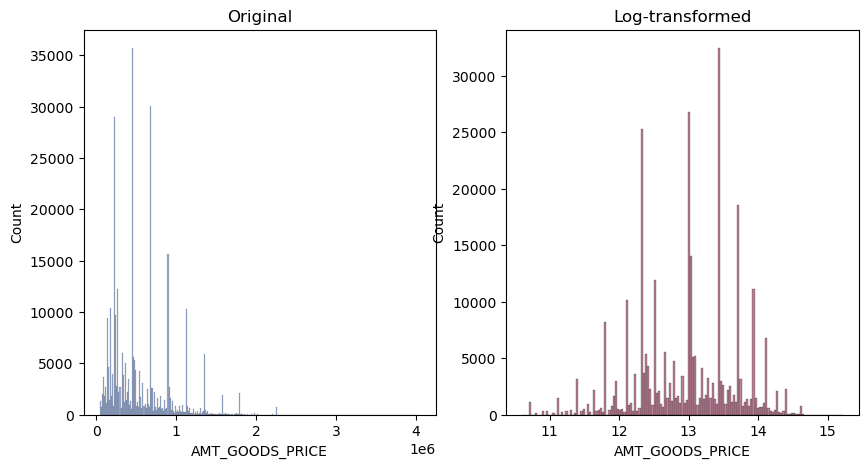

In [175]:
# AMT_GOODS_PRICE: 로그 변환

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df_pre['AMT_GOODS_PRICE'], ax=axes[0], color='#7C93C3')
sns.histplot(np.log1p(df_pre['AMT_GOODS_PRICE']), ax=axes[1], color='#A25772')
axes[0].set_title('Original')
axes[1].set_title('Log-transformed')

df_pre['AMT_GOODS_PRICE'] = np.log1p(df_pre['AMT_GOODS_PRICE'])

### 스케일링

In [177]:
# 숫자형 변수 리스트
cols_num = []

for col in df_pre.columns:
    if df_pre[col].dtype in ['int64', 'float64']:
        cols_num.append(col)

# Standard 스케일
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_pre[cols_num] = sc.fit_transform(df_pre[cols_num])
df_pre.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,1,0.142129,-0.216063,0.085996,-0.268450,1,-0.149452,1.506880,-0.456215,0.379837,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0.426792,1.402080,0.760647,1.365707,3,-1.252750,-0.166821,-0.460115,1.078697,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,-0.427196,-1.757668,-2.290342,-1.604457,1,-0.783451,-0.689509,-0.453299,0.206116,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,-0.142533,-0.583286,0.422819,-0.502027,1,-0.928991,-0.680114,-0.473217,-1.375829,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,-0.199466,0.108957,-0.137332,0.262158,1,0.563570,-0.892535,-0.473210,0.191639,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Train 데이터와 Test 데이터 분리

In [179]:
df_train = df_pre[df_pre['TARGET'] != '.']
df_test = df_pre[df_pre['TARGET'] == '.']
df_train.shape, df_test.shape

((120001, 84), (187510, 84))